In [1]:
import sys
sys.path.insert(1, '../')
from autograd import tensor
from autograd import modules
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt

reload(tensor)
np.random.seed(0)

## Generate Data

In [2]:
N_FEATURES = 3
true_coef = np.random.rand(N_FEATURES, 1)
true_bias = np.random.rand(1)

x = np.random.rand(100, N_FEATURES)
true_y = (x @ true_coef + true_bias).reshape(-1)
y = true_y + np.random.normal(scale = 0.05, size = (100,))

In [3]:
# Only if x is 1d
plt.scatter(x, y)
plt.plot(x, true_y, label = 'true')
plt.legend()

## Linear Regresssion

In [3]:
losses = []
lin = modules.Linear(N_FEATURES, 1,bias = True)
for epoch in range(1000):
    total_loss = 0

    for range_start in range(0,100,20):
        # TODO: Code DataLoader
        batch_x = tensor.tensor(x[range_start:range_start + 20], requires_grad = False)
        batch_y = tensor.tensor(y[range_start:range_start + 20].reshape(-1,1), requires_grad = False)

        yhat = lin(batch_x)

        # TODO: Code loss function
        error = batch_y - yhat
        loss = (error * error).sum()
        total_loss += loss.item()

        loss.backward()
        lin.weights -= lin.weights.grad * 0.001
        lin.bias -= lin.bias.grad * 0.001
    losses.append(total_loss)
        

## Visualizing Results

In [5]:
# Only if x is 1d
plt.scatter(x, y)
plt.plot(x, true_y, label = 'true')
plt.plot(x,lin(x), label = 'pred')
plt.legend()

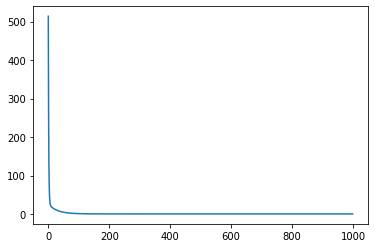

In [4]:
plt.plot(losses)